In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('Paired')

In [2]:
df = pd.read_csv("doencasMentais.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3458 entries, 0 to 3457
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sexo    3458 non-null   object 
 1   Doenca  3458 non-null   object 
 2   Idade   3458 non-null   float64
dtypes: float64(1), object(2)
memory usage: 81.2+ KB


In [4]:
df.head()

,Sexo,Doenca,Idade
0,M,equisofrenia,25.6
1,F,bipolaridade,25.8
2,M,bipolaridade,18.2
3,M,equisofrenia,23.7
4,F,bipolaridade,22.0


In [5]:
df["Sexo"] = df["Sexo"].astype("category")
df["Doenca"] = df["Doenca"].astype("category")

## Frequências

In [6]:
def plot_frequency(df, x, hue=None):
    if hue is None:
        sns.countplot(data=df, x=x)
        plt.title(f"Frequência de {x}")
    else:
        sns.countplot(data=df, x=x, hue=hue)
        plt.title(f"Frequência de {x} por {hue}")

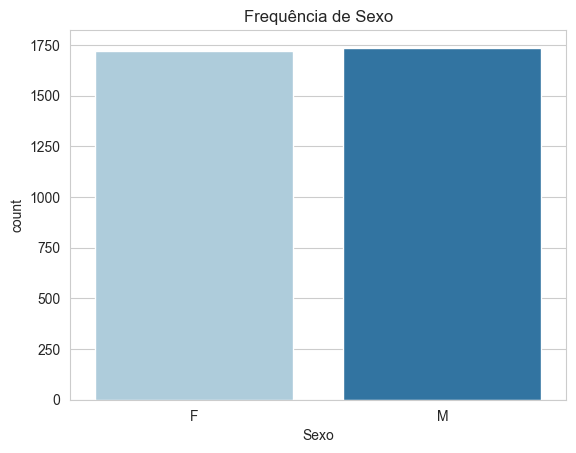

In [7]:
plot_frequency(df, "Sexo")

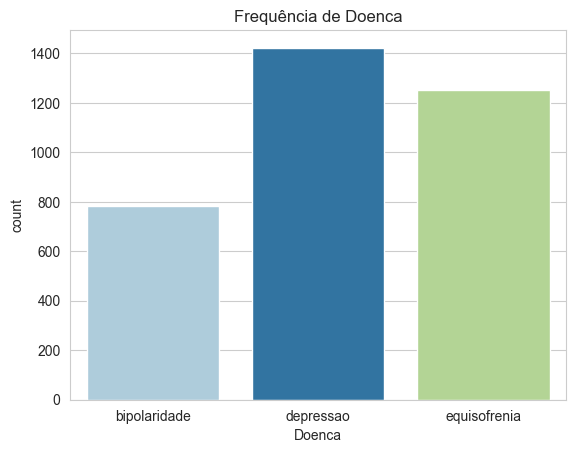

In [8]:
plot_frequency(df, "Doenca")

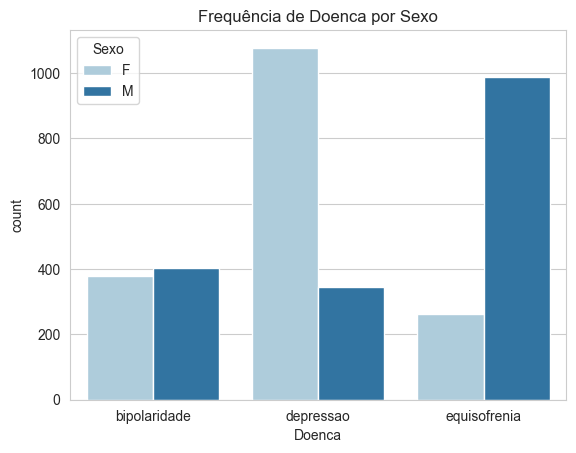

In [9]:
plot_frequency(df, "Doenca", "Sexo")

O conjunto de dados possui quantidade de pessoas do sexo masculino e feminino similares, e deixa evidente que esquisofrenia é muito mais frequente nos homens, ao passo que depressão é bem mais frequente em mulheres. Já bipolaridade aparentemente não predomina em nenhum dos sexos.

## Distribuições

In [10]:
print("Estatísticas de Idade")
df.describe()

Estatísticas de Idade


,Idade
count,3458.000000
mean,25.079439
std,4.235444
min,6.700000
25%,23.700000
50%,24.900000
75%,26.200000
max,63.500000


Text(0.5, 1.0, 'Distribuição de Idade')

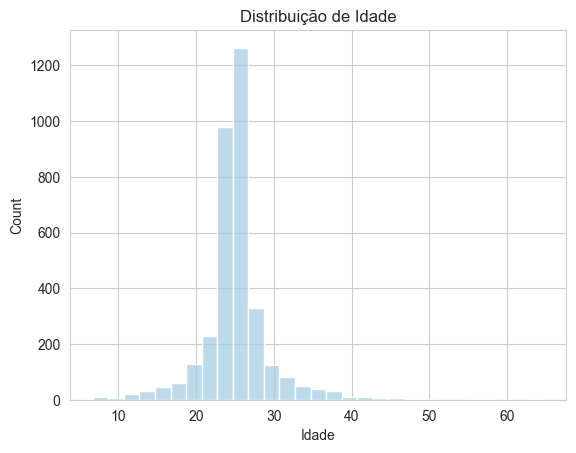

In [11]:
sns.histplot(df, x="Idade", binwidth=2)
plt.title("Distribuição de Idade")

In [12]:
def plot_facet_histogram(df, x, hue):
    g = sns.FacetGrid(df, col=hue, height=4, aspect=0.8)
    g.map(sns.histplot, x, binwidth=2)
    plt.suptitle(f'Distribuição de {x} por {hue}')
    plt.subplots_adjust(top=0.8, hspace=0.4)

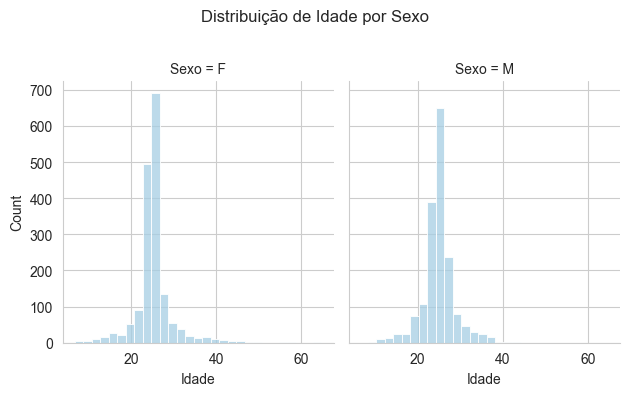

In [13]:
plot_facet_histogram(df, x="Idade", hue="Sexo")

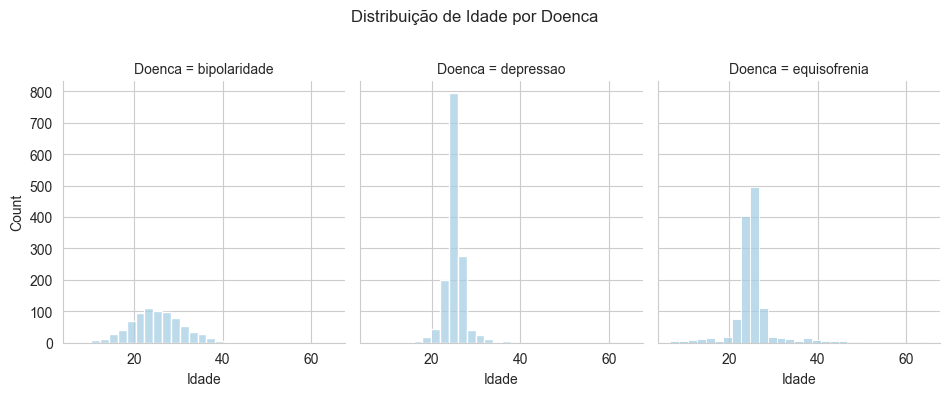

In [14]:
plot_facet_histogram(df, x="Idade", hue="Doenca")

Sexo masculino


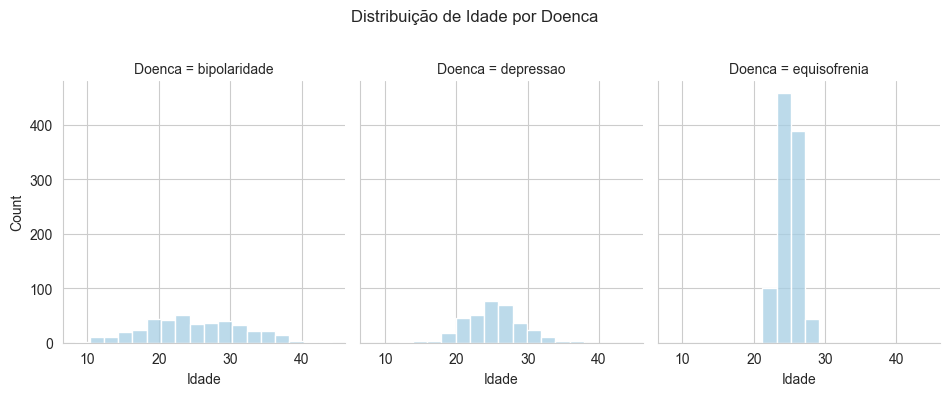

In [15]:
print(f"Sexo masculino")
plot_facet_histogram(df[df['Sexo'] == "M"], x="Idade", hue="Doenca")

Sexo feminino


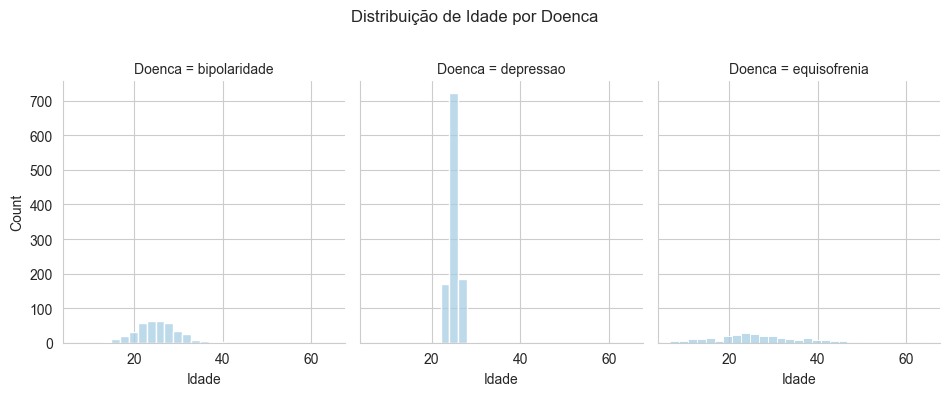

In [16]:
print(f"Sexo feminino")
plot_facet_histogram(df[df['Sexo'] == "F"], x="Idade", hue="Doenca")

A idade com relação ao sexo é distribuida de forma muito parecida, no entanto, o mesmo não acontece com relação às doenças. 

Observa-se que a esquisofrenia, muito mais frequente nos homens, tem diagnóstico concentrado em homens entre 20 e 30 anos, ao passo que nas mulheres o diagnóstico tem maior variabilidade de idade. 

Quanto à depressão, muito mais frequente nas mulheres, tem diagnóstico concentrado em mulheres entre 20 e 30 anos, ao passo que nos homens tem diagnóstico distribuido predominantemente em homens entre 18 e 36 anos. 

Bipolaridade apresenta-se com variablidade um pouco maior nos homens do que nas mulheres. 

